# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [81]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [82]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pprint(f"Number of cities in the list: {len(cities)}")

'Number of cities in the list: 607'


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
pprint("Beginning Data Retrieval     ")
pprint("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        pprint("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

'Beginning Data Retrieval     '
'-----------------------------'
Processing Record 1 of Set 1 | antofagasta
Processing Record 2 of Set 1 | kourou
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | thunder bay
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | telavi
Processing Record 8 of Set 1 | brooks
Processing Record 9 of Set 1 | palikir - national government center
Processing Record 10 of Set 1 | nar'yan-mar
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | tobi village
'City not found. Skipping...'
Processing Record 13 of Set 1 | laascaanood
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | arar
Processing Record 16 of Set 1 | bereket
Processing Record 17 of Set 1 | san jose village
'City not found. Skipping...'
Processing Record 18 of Set 1 | xichang
Processing Record 19 of Set 1 | mason
Processing Record 20 of Set 1 | aasiaat
Processing Record 

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
print(city_data_df)


               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       antofagasta -23.6500  -70.4000     16.60        68          38   
1            kourou   5.1552  -52.6478     25.03        89           9   
2         adamstown -25.0660 -130.1015     18.83        57           1   
3       thunder bay  48.4001  -89.3168     18.95        68         100   
4    margaret river -33.9500  115.0667     15.25        61          68   
..              ...      ...       ...       ...       ...         ...   
579        badagara  11.6000   75.5833     25.49        84          48   
580         xai-xai -25.0519   33.6442     18.36        72           2   
581       mount isa -20.7333  139.5000     24.87        31           5   
582         taulaga -11.0553 -171.0883     28.14        74          87   
583           shani  10.2162   12.0620     25.63        78         100   

     Wind Speed Country        Date  
0          2.00      CL  1690767047  
1          3.81      GF  1690767048

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,antofagasta,-23.6500,-70.4000,16.60,68,38,2.00,CL,1690767047
1,kourou,5.1552,-52.6478,25.03,89,9,3.81,GF,1690767048
2,adamstown,-25.0660,-130.1015,18.83,57,1,9.93,PN,1690766770
3,thunder bay,48.4001,-89.3168,18.95,68,100,1.54,CA,1690767048
4,margaret river,-33.9500,115.0667,15.25,61,68,3.00,AU,1690767048


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_homework.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_homework.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,antofagasta,-23.6500,-70.4000,16.60,68,38,2.00,CL,1690767047
1,kourou,5.1552,-52.6478,25.03,89,9,3.81,GF,1690767048
2,adamstown,-25.0660,-130.1015,18.83,57,1,9.93,PN,1690766770
3,thunder bay,48.4001,-89.3168,18.95,68,100,1.54,CA,1690767048
4,margaret river,-33.9500,115.0667,15.25,61,68,3.00,AU,1690767048


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

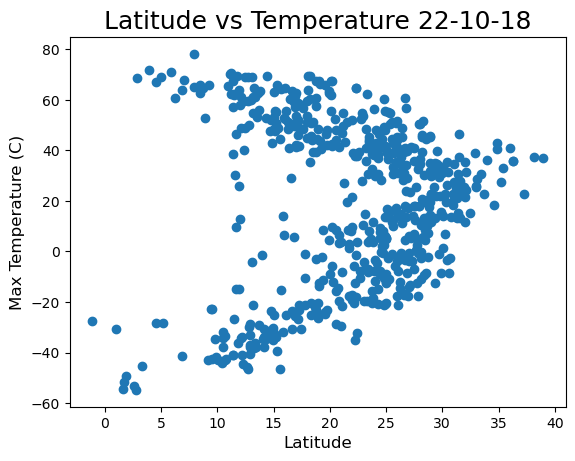

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
marker_size=15
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.title("Latitude vs Temperature 22-10-18", fontsize=18)

# Save the figure
plt.savefig("../output_data/Fig1homework.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

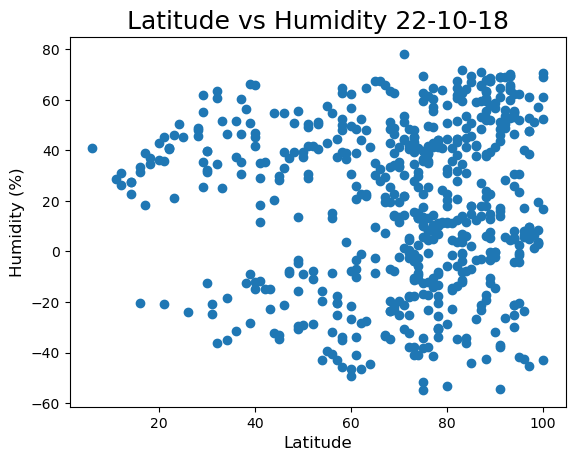

In [73]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("Latitude vs Humidity 22-10-18", fontsize=18)


# Save the figure
plt.savefig("../output_data/Fig2homework.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

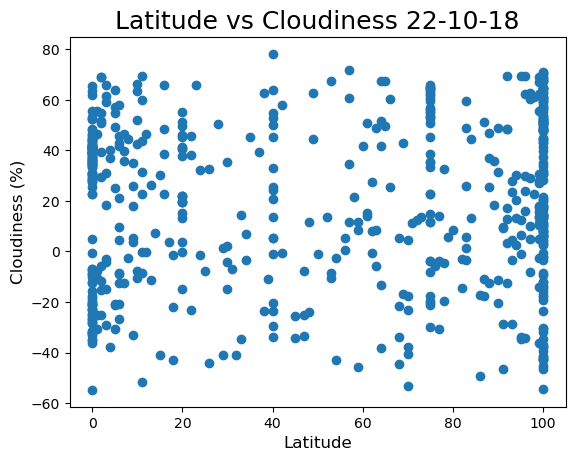

In [74]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title("Latitude vs Cloudiness 22-10-18", fontsize=18)

# Save the figure
plt.savefig("../output_data/Fig3homework.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

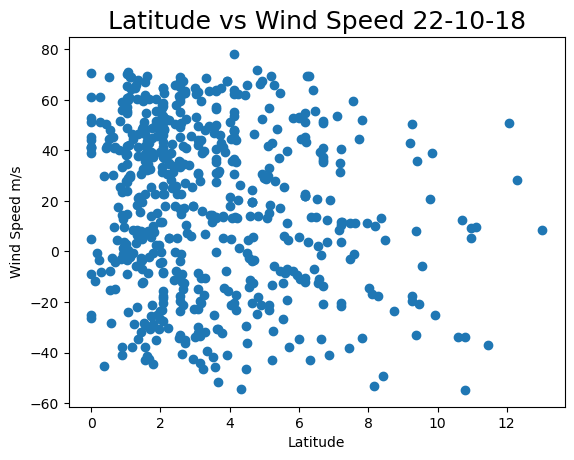

In [75]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.title("Latitude vs Wind Speed 22-10-18", fontsize=18)

# Save the figure
plt.savefig("../output_data/Fig4homework.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kourou,5.1552,-52.6478,25.03,89,9,3.81,GF,1690767048
3,thunder bay,48.4001,-89.3168,18.95,68,100,1.54,CA,1690767048
6,telavi,41.9198,45.4731,17.28,86,60,1.02,GE,1690767049
7,brooks,50.5834,-111.8851,27.99,24,100,9.26,CA,1690766818
8,palikir - national government center,6.9248,158.1611,27.47,83,100,1.54,FM,1690766765


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,antofagasta,-23.6500,-70.4000,16.60,68,38,2.00,CL,1690767047
2,adamstown,-25.0660,-130.1015,18.83,57,1,9.93,PN,1690766770
4,margaret river,-33.9500,115.0667,15.25,61,68,3.00,AU,1690767048
5,hermanus,-34.4187,19.2345,12.11,75,45,7.81,ZA,1690767049
10,invercargill,-46.4000,168.3500,15.57,60,91,4.47,NZ,1690767000


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.21x + 30.58
The r-squared is: -0.5900844328745409
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


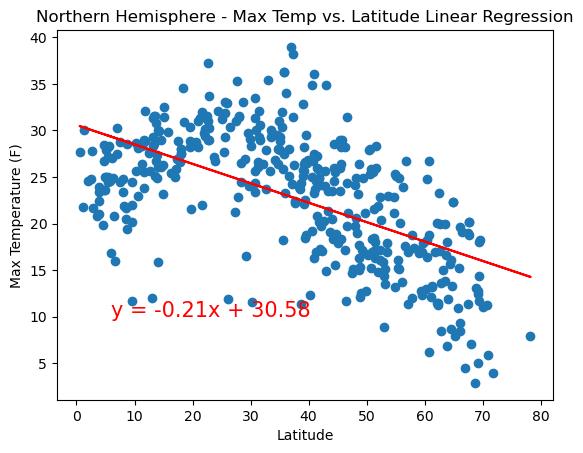

In [102]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")

# Save the figure
plt.savefig("../output_data/tempvslat_northern.hem.png")

plt.show()

Regression line equation is: y = 0.4x + 27.4
The r-squared is: 0.7969753099692494
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


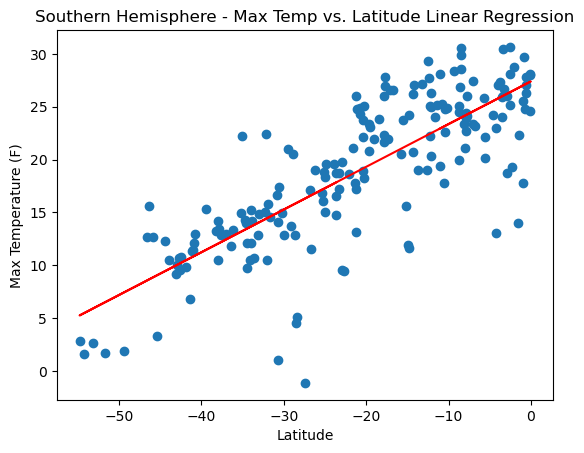

In [103]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")

# Save the figure
plt.savefig("../output_data/tempvslat_southern.hem.png")

plt.show()

**Discussion about the linear relationship:*Northern and Southern Hemisphere - maximum tempreture vs latitude* 

For Norther hemisphere maximum tempreature vs Latitude Linear Regression plot, the regression displays a negative correlation. In the nothern hemisphere, as you move away from the equator the temperature decreases.
Whereas based on the southern hemisphere data; maximum tempreature vs Latitude extracting the Linear Regression plot shows a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.04x + 72.31
The r-squared is: -0.039072766976879884
The regression does not display much of a correlation between the data sets.


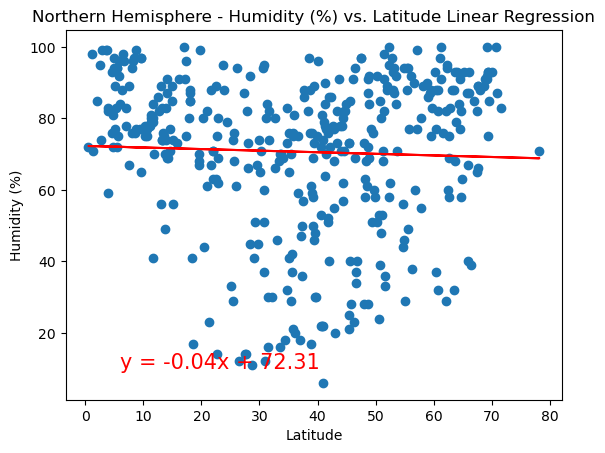

In [104]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 

# Save the figure
plt.savefig("../output_data/humidityvslat_northern.hem.png")

plt.show()

Regression line equation is: y = 0.08x + 70.99
The r-squared is: 0.06238850764104136
The regression does not display much of a correlation between the data sets.


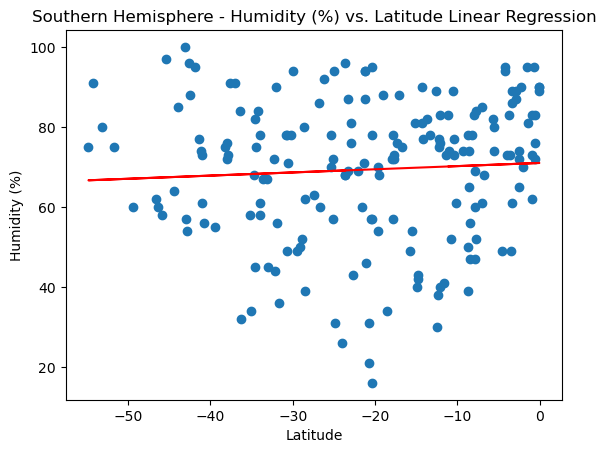

In [105]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

# Save the figure
plt.savefig("../output_data/humidityvslat_southern.hem.png")

plt.show()

**Discussion about the linear relationship:*Northern and Southern Hemisphere - humidity vs latitude* 

For Norther hemisphere and Southern Hemisphere; maximum humidity vs Latitude Linear Regression plot, neither of the regression display much of a correlation between the data sets.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.15x + 59.82
The r-squared is: -0.07206485943212786
The regression does not display much of a correlation between the data sets.


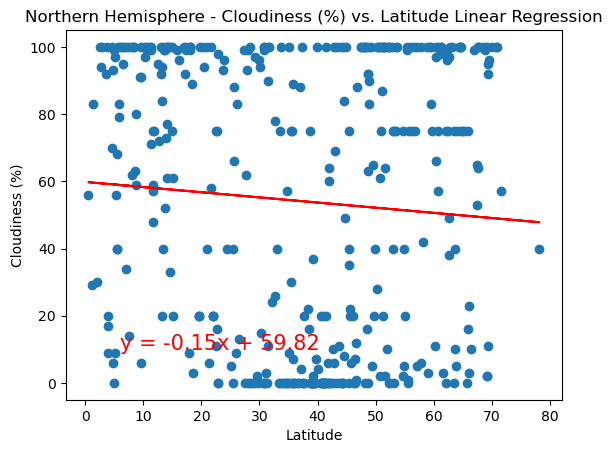

In [106]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

# Save the figure
plt.savefig("../output_data/cloudvslat_northern.hem.png")

plt.show()

Regression line equation is: y = -0.28x + 40.56
The r-squared is: -0.09726107985593534
The regression does not display much of a correlation between the data sets.


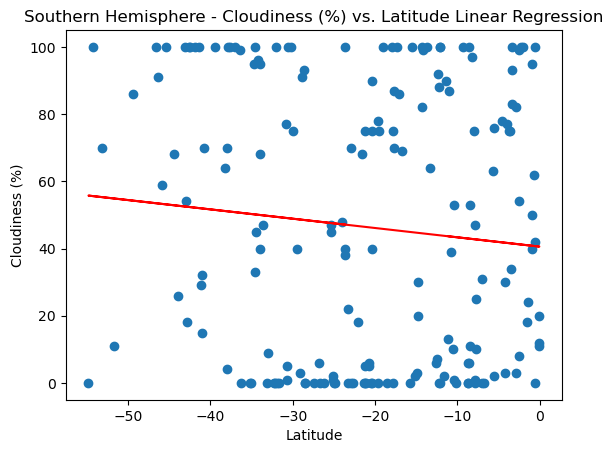

In [107]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

# Save the figure
plt.savefig("../output_data/cloudvslat_southern.hem.png")

plt.show()

**Discussion about the linear relationship:*Northern and Southern Hemisphere - Cloudiness vs latitude* 

For Norther hemisphere and Southern Hemisphere; Cloudiness vs Latitude Linear Regression plot, neither of the regression display much of a correlation between the data sets.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.02x + 4.1
The r-squared is: -0.18246435129328936
The regression does not display much of a correlation between the data sets.


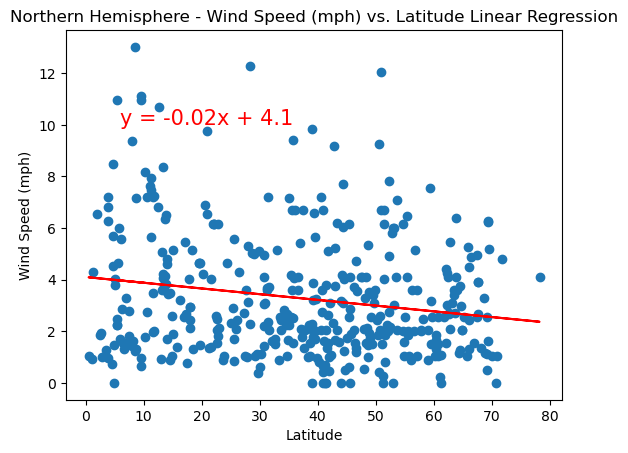

In [108]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

# Save the figure
plt.savefig("../output_data/windvslat_northern.hem.png")

plt.show()

Regression line equation is: y = -0.03x + 3.09
The r-squared is: -0.16089925674985073
The regression does not display much of a correlation between the data sets.


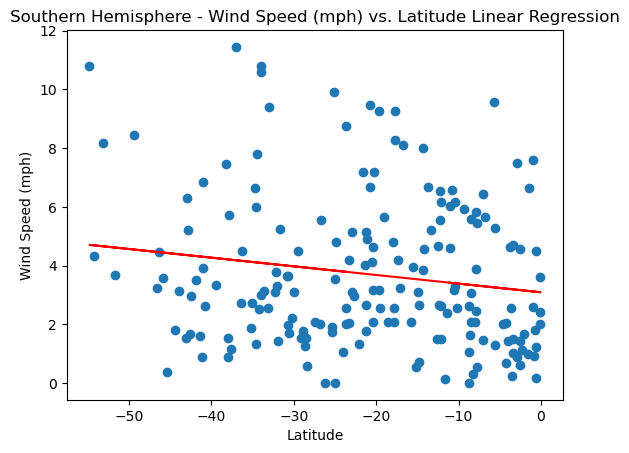

In [109]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

# Save the figure
plt.savefig("../output_data/windvslat_southern.hem.png")

plt.show()

**Discussion about the linear relationship:*Northern and Southern Hemisphere - Wind Speed vs latitude* 

For Norther hemisphere and Southern Hemisphere; Wind Speed vs Latitude Linear Regression plot, neither of the regression display much of a correlation between the data sets.